## SNR tests

The Annecy 2022 event will be chosen as an example to investigate precisely the SNR calculation, and based on this the filtering of stations prior to any further processing.

Generally body wave phase picks are defined by their velocity or tauPy picker, for the Lg wave there is a velocity window set, which is why the windows have different lengths.

We will investigate in this the different SNR of different phases, check how the decrease in SNR behaves over distance, and find two regimes which can be set. Subsequently, we will see how the cutoff distance behaves, and if the coda window, which is set based on this cutoff distance, is adequate (plot traces with time window marked.)

#### Defining variables and reading in data for event

In [83]:
minlat = 37
maxlat = 50.0
minlon = -5
maxlon = 17




minmag = 3.5
Dtmin_Noise=-25
Dtmax_Noise=-5
Dtmin_Pn=-5.
Dtmax_Pn=10.
Dtmin_Sn=-5.
Dtmax_Sn=10.

vLg_max=3.5
vLg_min=3.1
vLg=0.5*(vLg_max+vLg_min)
vPg_max=6.2
vPg_min=5.2
vPg=0.5*(vPg_max+vPg_min)
#vPg=6.

tminCoda=300.
tmaxCoda=320.
event_name='Annecy_2022' # newly added
event_name='Rhone Valley' # quite good Lg wave arrivals, however velocity not well defined
event_name='Adriatic' # a regarder
event_name='Appennines'#data?
event_name='Vierzon' #data?
event_name='LaRochelle_X7west'
event_name='Genova' #data?
event_name='Friul' 
event_name='France_west' # newly added
event_name='France_Rochemaure' # newly added
event_name='France_X7center'  #data?
event_name='Spain_3_X7west' #data?
event_name='Spain_1_X7west'
event_name='France_east_2014' #newly added
event_name='Massif Central' # a regarder
event_name='France_east_2012' #newly added
event_name='France_north_east_2003' #newly added


if event_name == 'France_north_east_2003':
    start = UTCDatetime("2003-02-22T20:31:03")
    start = UTCDatetime("2003-02-22T21:31:03")

if event_name == 'France_east_2012':
    start = UTCDateTime("2012-03-02T07:10:50 ")
    end = UTCDateTime("2012-03-02T08:10:50 ")





if event_name == 'France_east_2014':
    start = (UTCDateTime("2014-04-07T19:20:00"))
    end = (UTCDateTime("2014-04-07T20:20:00"))


if event_name == 'Spain_1_X7west'  :
    start = UTCDateTime("2013-01-09") #Spain_1_X7west M3.7
    end = UTCDateTime("2013-01-10")   #

if event_name == 'Spain_3_X7west'  :
    start = UTCDateTime("2013-04-04") #Spain_3_X7west M3.9
    end = UTCDateTime("2013-04-05")   #


if event_name == 'France_X7center'  :
    start = UTCDateTime("2014-01-25") #France_X7center M3.9
    end = UTCDateTime("2014-01-26")   #



if event_name == 'France_Rochemaure' :
    start = UTCDateTime("2019-11-11 10:50:46 ") #magnitude 4.9
    end = UTCDateTime("2019-11-11 10:55:46 ")


if event_name == 'France_west'  :
    start = UTCDateTime("2013-11-21 09:50:06") #France_west M3.7
    end = UTCDateTime("2013-11-21 10:00:06")   #


if event_name == 'Genova'  :
    start = UTCDateTime("2022-02-28") #Genova event
    end = UTCDateTime("2022-03-01")   #Genova event M4.0


if event_name == 'LaRochelle_X7west'  :
    start = UTCDateTime("2013-03-06") #LaRochelle_X7west M3.8
    end = UTCDateTime("2013-03-07")   #

if event_name == 'Friul' :
    start = UTCDateTime("2024-03-27T21:06:00")   #Friul M4.5 event
    end = UTCDateTime("2024-03-27T22:08:00") #Friul M4.5 event



if event_name == 'Appennines' :
    start = UTCDateTime("2022-02-01T22:06:00")   #Appennines M3.7 event
    end = UTCDateTime("2022-02-01T23:08:00") #Appennines M3.7 event



if event_name == 'Vierzon'  :
    start = UTCDateTime("2013-09-25") #Vierzon
    end = UTCDateTime("2013-09-26")   #
    


if event_name == 'Adriatic' :
    start = UTCDateTime("2022-11-09T06:06:00")   #Adriatic M5.6event
    end = UTCDateTime("2022-11-09T06:08:00") #Adriatic M5.6 event

if event_name == 'Annecy_2022'  :
    start = UTCDateTime("2022-03-12 17:00:22 ") #Annecy 2022 event M4.2
    end = UTCDateTime("2022-03-12 17:13:22 ")

if event_name == 'Massif Central' :
    start = UTCDateTime("2022-05-09T11:11:00")   #massif central
    end = UTCDateTime("2022-05-09T11:16:00") #massif central M4.0

if event_name == 'Rhone Valley' :
    start = UTCDateTime("2019-11-11")   #rhone valley event
    end = UTCDateTime("2019-11-12") #rhone valley event

events_list = Client("USGS").get_events(
    minlatitude=minlat,
    maxlatitude=maxlat,
    minlongitude=minlon,
    maxlongitude=maxlon,
    minmagnitude=minmag,
    starttime=start,
    endtime=end
)
print("\nFound %s event(s) from EMSC Data Center:\n" % len(events_list))
print(events_list.__str__(print_all=True))



eqo = events_list[0].origins[0]
eq_start = eqo.time
print(type(eq_start))
t_duration=500. #length of window to request
eq_end = eq_start + t_duration
eq_lat=eqo.latitude
print((eq_end))
eq_lon=eqo.longitude
eq_epi=(eq_lat,eq_lon)
degmin=1.9
degmax=10.
start = eq_start
end = eq_end
datacenters=['RESIF','ODC','ETH','INGV','GEOFON','BGR', 'IRIS', 'ICGC']
st_all, stations_all, plot = big_downloader2(datacenters,start,end,eq_lon,eq_lat,degmin,degmax,directory='/home/schreinl/Stage/Data/',plot=True)
plot


Found 1 event(s) from EMSC Data Center:

1 Event(s) in Catalog:
2012-03-02T07:15:50.780000Z | +44.489,   +6.705 | 4.5  mb | manual
<class 'obspy.core.utcdatetime.UTCDateTime'>
2012-03-02T07:24:10.780000Z


Processing stations of RESIF:   0%|          | 0/122 [00:00<?, ?it/s]/home/schreinl/.local/lib/python3.10/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
Processing stations of ODC:   0%|          | 0/131 [00:00<?, ?it/s]/home/schreinl/.local/lib/python3.10/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
Processing stations of ETH:   0%|          | 0/41 [00:00<?, ?it/s]/home/schreinl/.local/lib/python3.10/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
Processing stations of INGV:   0%|     

1 Trace(s) in Stream:
HS.GWBC..HHZ | 2012-03-02T07:15:50.780000Z - 2012-03-02T07:24:10.780000Z | 100.0 Hz, 50001 samples False


Processing stations of BGR:  83%|████████▎ | 78/94 [00:33<00:04,  3.43it/s]

1 Trace(s) in Stream:
HS.GWBF..HHZ | 2012-03-02T07:15:50.780000Z - 2012-03-02T07:24:10.780000Z | 100.0 Hz, 50001 samples False


Processing stations of BGR:  84%|████████▍ | 79/94 [00:34<00:04,  3.00it/s]

1 Trace(s) in Stream:
HS.WBA..HHZ | 2012-03-02T07:15:50.780000Z - 2012-03-02T07:24:10.780000Z | 100.0 Hz, 50001 samples False


Processing stations of BGR:  85%|████████▌ | 80/94 [00:35<00:05,  2.37it/s]

1 Trace(s) in Stream:
HS.WBB..HHZ | 2012-03-02T07:15:50.780000Z - 2012-03-02T07:24:10.780000Z | 100.0 Hz, 50001 samples False


Processing stations of BGR:  86%|████████▌ | 81/94 [00:35<00:05,  2.24it/s]

1 Trace(s) in Stream:
HS.WBG..HHZ | 2012-03-02T07:15:50.780000Z - 2012-03-02T07:24:10.780000Z | 100.0 Hz, 50001 samples False


Processing stations of IRIS:  42%|████▏     | 53/126 [00:19<00:21,  3.46it/s]/home/schreinl/.local/lib/python3.10/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
Processing stations of ICGC:   0%|          | 0/21 [00:00<?, ?it/s]/home/schreinl/.local/lib/python3.10/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
Processing stations of ICGC: 100%|██████████| 21/21 [00:00<00:00, 25.31it/s]


#### Applying a bandpass filter


In [84]:
fmin=3
fmax=6
f0=0.5*(fmin+fmax)

st_plot_filt_all=st_all.copy()
st_plot_filt_all.filter("bandpass", freqmin=fmin, freqmax=fmax)
print((st_plot_filt_all))

485 Trace(s) in Stream:

FR.ATE.00.BHZ | 2012-03-02T07:15:50.829294Z - 2012-03-02T07:24:10.779294Z | 20.0 Hz, 10000 samples
...
(483 other traces)
...
ES.EJON..HHZ | 2012-03-02T07:15:50.777700Z - 2012-03-02T07:24:10.777700Z | 100.0 Hz, 50001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


### Now start the SNR testing

First running SNR_all, which does all the processing steps, putting out the SNR ratios with the station info in form (net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg, SNR_Pn, SNR_Pg, SNR_Sn, SNR_Lg), as well as the filtered stations with their amplitudes in form (net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg, A_Pn, A_Sn, A_Lg, A_Coda, A_Noise, A_Pg).

In [94]:

stations_with_SNR, distance_dict, tcoda_test, filtered_st, stations_with_amps, amp_plot = SNR_all(stations_all, st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tminCoda, tmaxCoda,
         Dtmin_Noise, Dtmax_Noise,eq_start,eq_lat,eq_lon,plot_SNR=False,plot_amps=True, wavecode="Lg_Coda",dB=True)
print(tcoda_test)
amp_plot


calculating SNR for Pn  phase
calculating SNR for Pg  phase


/tmp/ipykernel_10649/3454016207.py:674: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectPn,np.transpose(dataselectPn)))/len(dataselectPn)
/tmp/ipykernel_10649/3454016207.py:675: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
/tmp/ipykernel_10649/3454016207.py:706: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectPg,np.transpose(dataselectPg)))/len(dataselectPg)
/tmp/ipykernel_10649/3454016207.py:707: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)


calculating SNR for Sn  phase
calculating SNR for Lg  phase


/tmp/ipykernel_10649/3454016207.py:690: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectSn,np.transpose(dataselectSn)))/len(dataselectSn)
/tmp/ipykernel_10649/3454016207.py:691: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
/tmp/ipykernel_10649/3454016207.py:658: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectLg,np.transpose(dataselectLg)))/len(dataselectLg)
/tmp/ipykernel_10649/3454016207.py:659: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)


Reduced from   450  stations to   303  stations due to insufficient SNR or distance >  748.3555810758684
coda window set from 324.2874184662096-344.2874184662096s
plotting Lg_Coda amplitudes
324.2874184662096


### Coda time window

The time window is set specifically for each event, since it depends on the cutoff distance. 

1.157404767582193e-07
1.157404767582193e-07
1.157404767582193e-07
2.8935210139025003e-07
2.8935210139025003e-07
2.8935210139025003e-07
2.8935210139025003e-07
2.8935210139025003e-07
2.8935210139025003e-07
5.787042027805001e-07
5.787023837910965e-07
5.787042027805001e-07


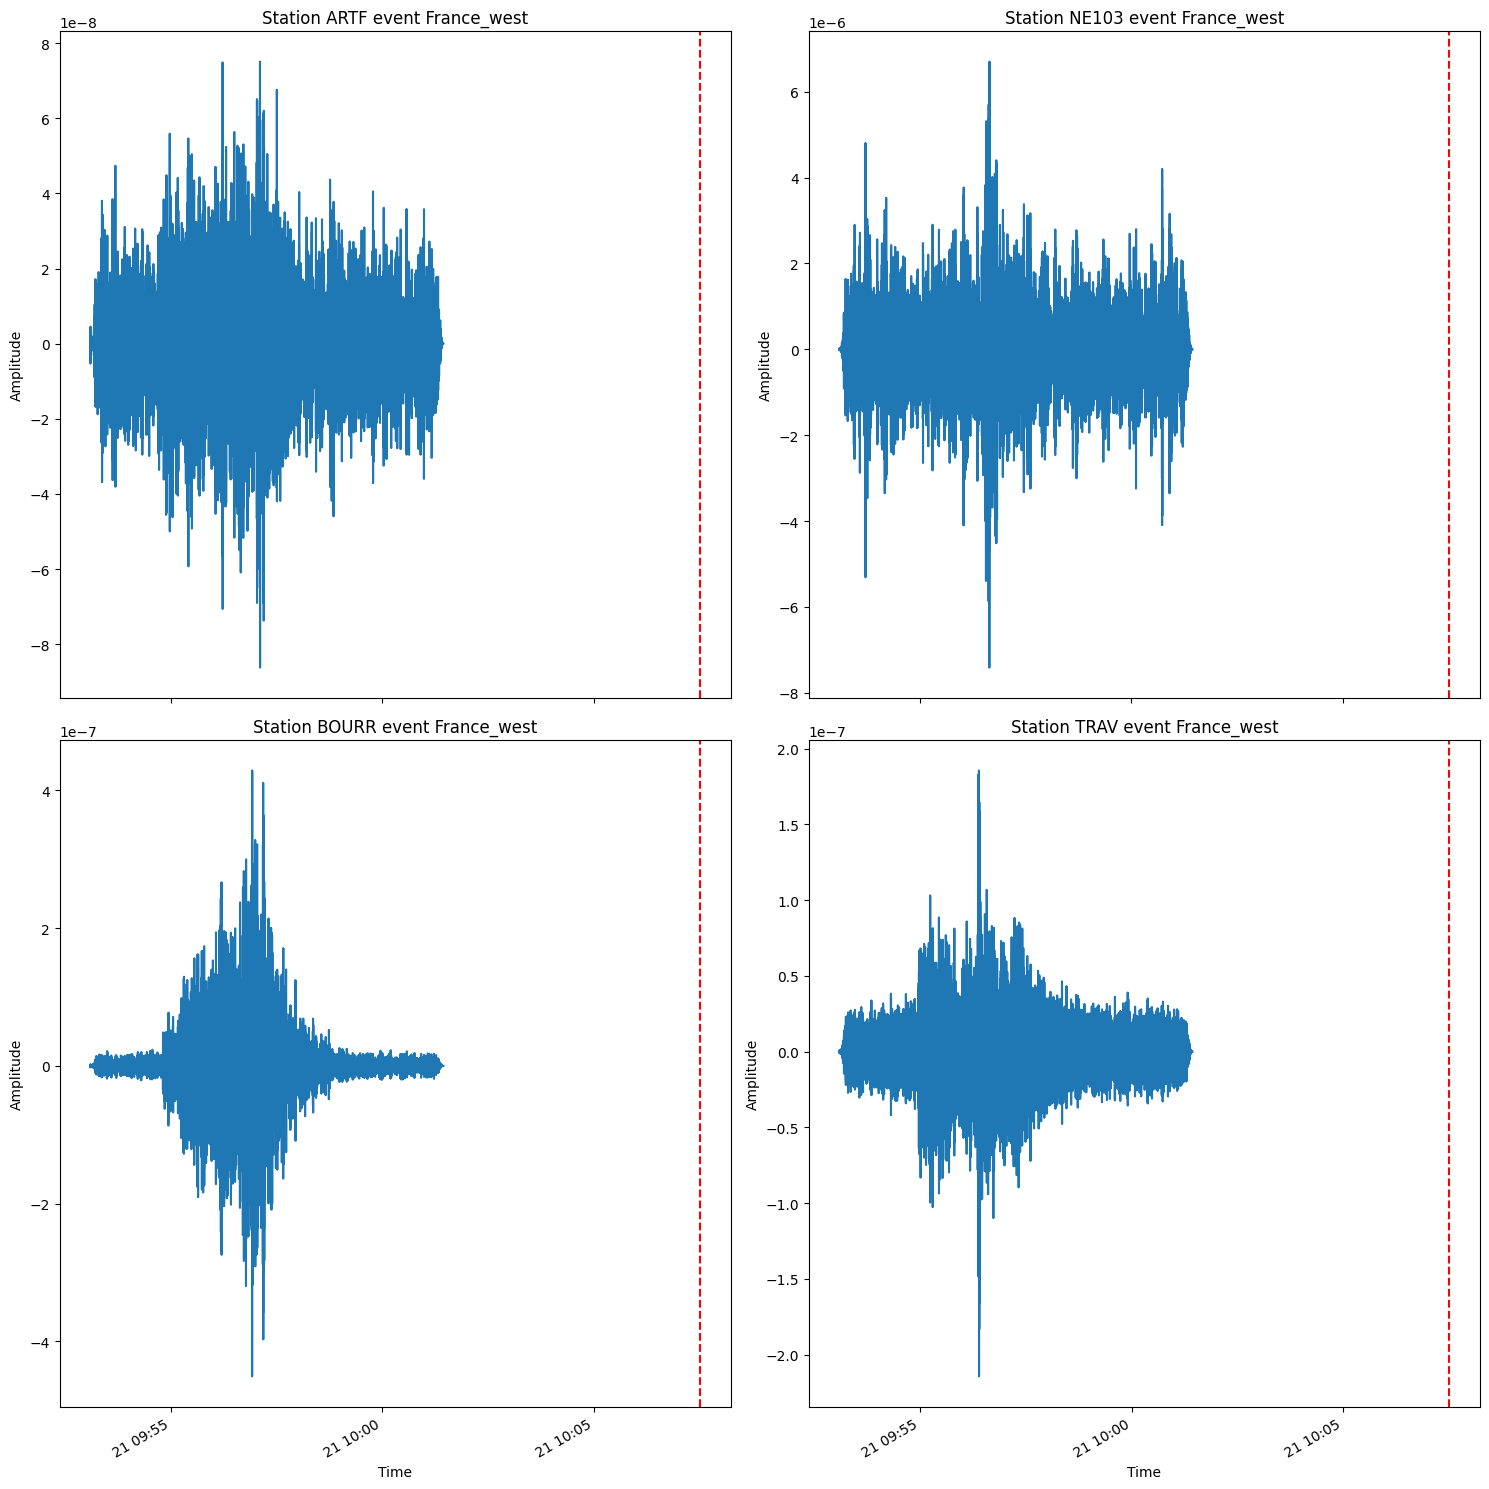

In [43]:

example_traces_idx = [0, 100, 120, 169]
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for i, idx in enumerate(example_traces_idx):
    tr = st_plot_filt_all[idx]
    ax = axs[i // 2, i % 2]

    ax.plot(tr.times("matplotlib"), tr.data)
    coda_start = tr.times("matplotlib")[0] + 0.01
    coda_end = tr.times("matplotlib")[0] + 300
    print((tr.times("matplotlib")[1])-(tr.times("matplotlib")[0]))
    print((tr.times("matplotlib")[2])-(tr.times("matplotlib")[1]))
    print((tr.times("matplotlib")[3])-(tr.times("matplotlib")[2]))

    ax.axvline(coda_start, color='r', linestyle='--', label="start coda window")
    #ax.axvline(coda_end, color='r', linestyle='--', label="end coda window")  
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Station {tr.stats.station} event {event_name}')
    ax.xaxis_date()
    fig.autofmt_xdate()

plt.tight_layout()
plt.show()




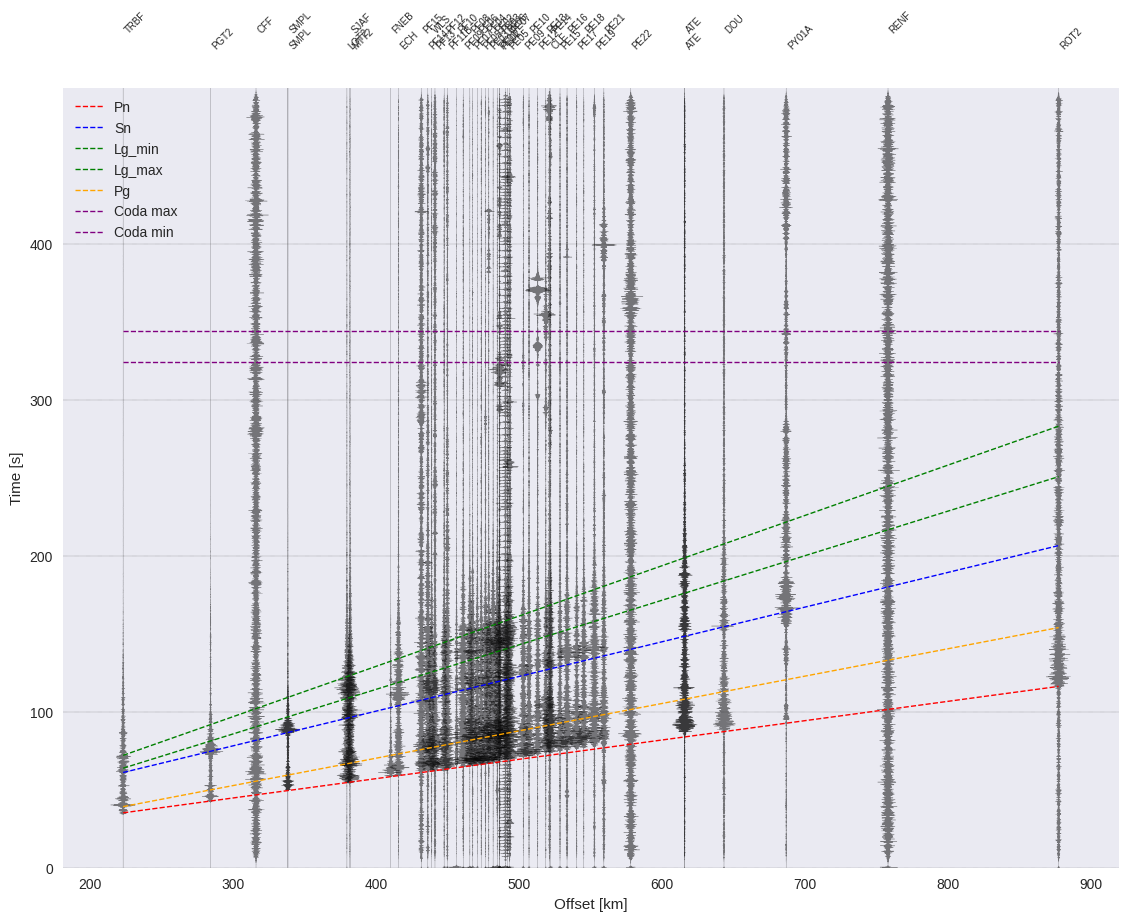

324.2874184662096


In [86]:
plot, st_Lg0 = plot_record_section(st_plot_filt_all[0:50], stations_all[0:50], eq_lat, eq_lon, eq_start, tracehodo=True, v_Lg_min=vLg_min, v_Lg_max=vLg_max, 
v_Pg=vPg,tmincoda=tcoda_test,tmaxcoda=tcoda_test+20)
print(tcoda_test)

### Checking behaviour of body wave phase SNR

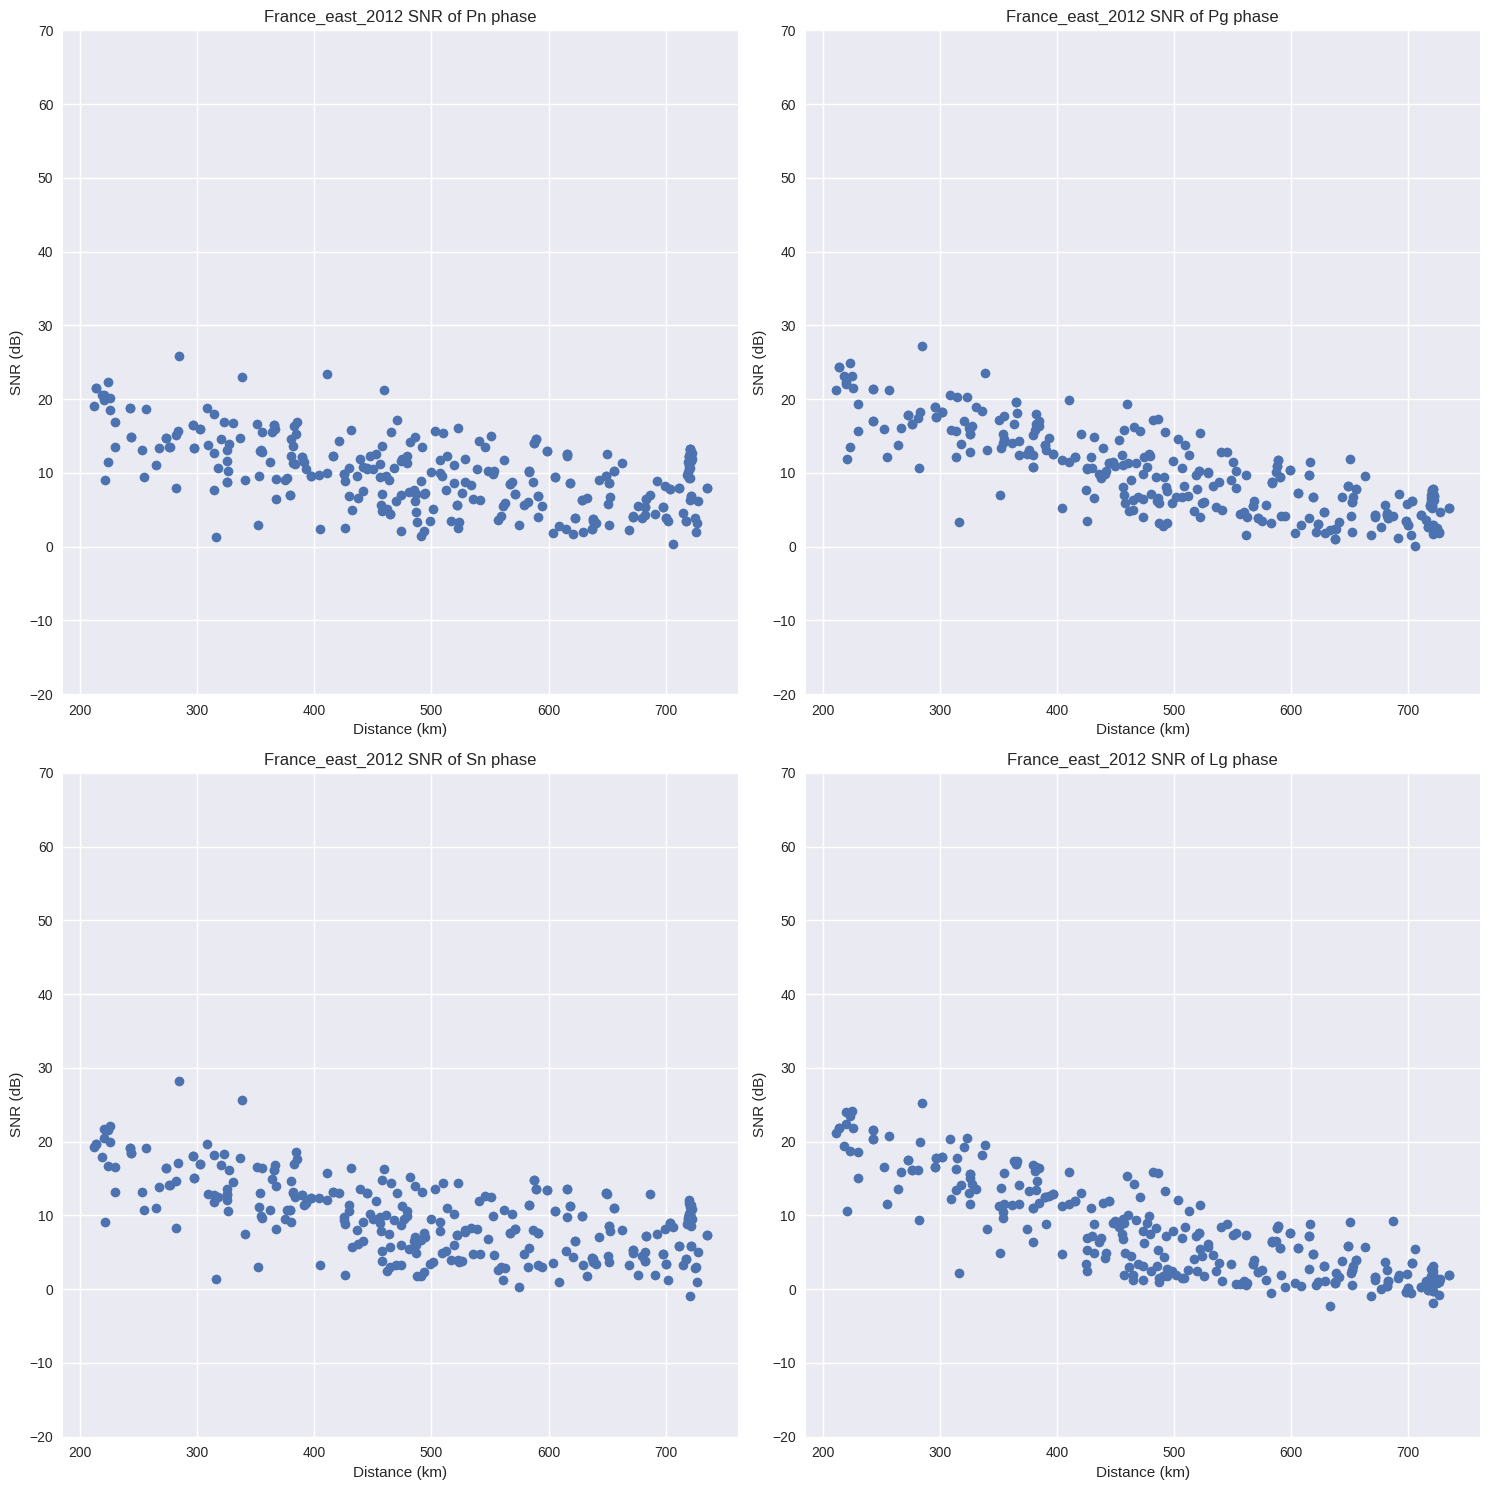

In [87]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
plt.style.use('seaborn-v0_8')
phases = ['Pn', 'Pg', 'Sn', 'Lg']
for i in range(10,14):
    SNR_vals = stations_with_SNR[:,i].astype(float)
    dist_vals = stations_with_SNR[:,5].astype(float)/1000.
    
    ax = axs[(i-10)//2, (i-10)%2]
    ax.plot(dist_vals, SNR_vals, 'o')
    ax.set_ylim([-20, 70])
    ax.set_xlabel('Distance (km)')
    ax.set_ylabel('SNR (dB)')
    ax.set_title(f'{event_name} SNR of {phases[i-10]} phase')
#plt.savefig(f'/home/schreinl/Stage/Figures/SNR/{event_name}_SNR_phases_long.png', format='png')
plt.tight_layout()
plt.show()


#### Segment SNR/Distance in two regimes
There can be two regimes introduced, one where there is direct energy of the incoming wave, and one where there is no more energy, thus low SNR values. Finding the cutoff distance for the different bodywave, which corresponds to this change in regimes, is integral in defining the time window for the coda waves, as for this we need a time window without onset of energy from direct phases, and with energy of only scattered waves.

calculating SNR for coda  phase
Distance where 90% of SNR values are above 2: 829.4223972125699
calculating SNR for Pn  phase


/tmp/ipykernel_10649/3258592255.py:855: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectCoda,np.transpose(dataselectCoda)))/len(dataselectCoda)
/tmp/ipykernel_10649/3258592255.py:856: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
/tmp/ipykernel_10649/3258592255.py:991: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(dist_vals[dist_vals > percentile_distance], poly1d_fn1(dist_vals[dist_vals > percentile_distance]), 'r', color='r', label='insufficient SNR')
/tmp/ipykernel_10649/3258592255.py:992: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(dist_vals[dist_vals 

Distance where 90% of SNR values are above 2: 813.7103696930207
calculating SNR for Sn  phase
Distance where 90% of SNR values are above 2: 807.4592817596626
calculating SNR for Pg  phase


/tmp/ipykernel_10649/3258592255.py:919: RuntimeWarning: invalid value encountered in scalar divide
  signal_power = np.sqrt(np.dot(dataselectPg,np.transpose(dataselectPg)))/len(dataselectPg)
/tmp/ipykernel_10649/3258592255.py:920: RuntimeWarning: invalid value encountered in scalar divide
  noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)


Distance where 90% of SNR values are above 2: 770.5143969428052


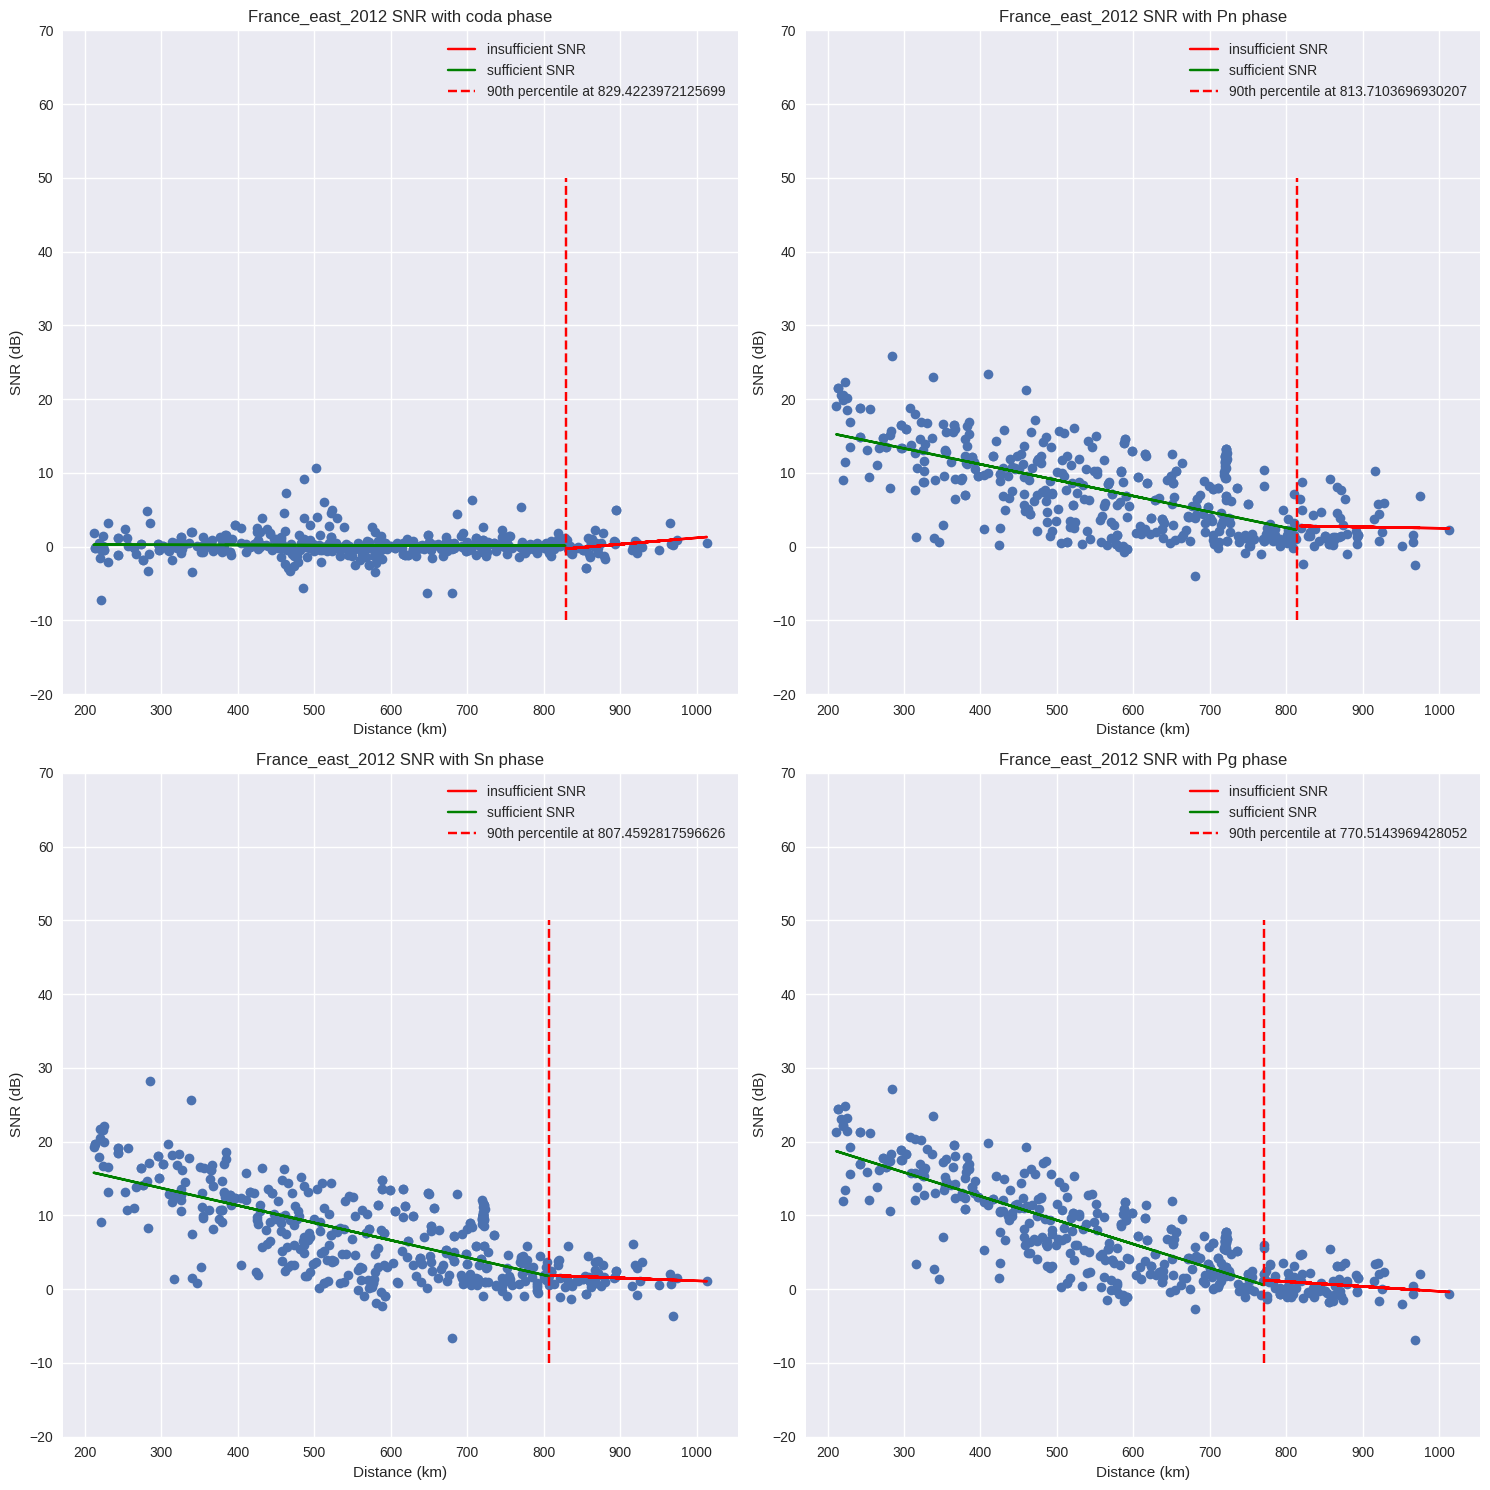

In [88]:
SNR_distance_threshold = SNR_distance(stations_all, st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tminCoda, tmaxCoda,
                 Dtmin_Noise, Dtmax_Noise, eq_start, dB=True)

In [47]:
for key, values in distance_dict.items():
    print(f"{key}: {values['percentile_distance']}")

Pn: 967.812656077207
Pg: 927.2305066734842
Sn: 1016.171437332721
Lg: 909.9111384536712


#### Streamline the process to have more datapoints of earthquakes

In [ ]:
import json
catalogue = pd.read_csv('/home/schreinl/Stage/Data/eq_4_france.csv') 
directory='/home/schreinl/Stage/Data/
datacenters =['RESIF','ODC','ETH','INGV','GEOFON','BGR', 'IRIS', 'ICGC']
distmin=1.9
distmax=10.
Dtmin_Noise=-25
Dtmax_Noise=-5
Dtmin_Pn=-5.
Dtmax_Pn=10.
Dtmin_Sn=-5.
Dtmax_Sn=10.
vLg_max=3.5
vLg_min=3.1
vLg=0.5*(vLg_max+vLg_min)
vPg_max=6.2
vPg_min=5.2
vPg=0.5*(vPg_max+vPg_min)
for i in range(len(catalogue)):
    print(f'Processing earthquake {i+1} out of {len(catalogue)}')

    start = UTCDateTime(catalogue['time'][i])
    eq_start = start
    end = start + 400
    eq_lon = float(catalogue['longitude'][i])
    eq_lat = float(catalogue['latitude'][i])

    # Start downloading routine
    st_all, stations_all, plot = big_downloader2(datacenters, start, end, eq_lon, eq_lat, distmin, distmax, directory, plot=False)
    fmin=3
    fmax=6
    f0=0.5*(fmin+fmax)

    st_plot_filt_all=st_all.copy()
    st_plot_filt_all.filter("bandpass", freqmin=fmin, freqmax=fmax)
    stations_with_SNR, distance_dict, tcoda_test, filtered_st, stations_with_amps, amp_plot = SNR_all(stations_all, st_plot_filt_all, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tminCoda, tmaxCoda,
         Dtmin_Noise, Dtmax_Noise,eq_start,eq_lat,eq_lon,plot_SNR=False,plot_amps=True, wavecode="Lg_Coda",dB=True)
    with open("directorydict.txt", "w") as file:
     json.dump(distance_dict, file, indent=4)


### Defined functions:

In [92]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from obspy.clients.fdsn import RoutingClient
from obspy import Stream
from obspy.geodetics import gps2dist_azimuth
from obspy import signal

import matplotlib.pyplot as plt
import folium
import numpy as np

def select_ratio(wavecode, stations_with_amps):
    '''
    this only works when the stations_with amps file is in this format:
    net (0), sta (1), lat (2), lon (3), elev (4) , dist(5), az(6), 
    t_Pn (7), t_Sn (8), t_Pg(9), A_Pn (10), A_Sn (11), A_Lg(12), A_Coda(13), A_Noise(14), A_pg(15)

    '''
    distDraw=stations_with_amps[:,5].astype(float)/1000.
    azDraw=stations_with_amps[:,6].astype(float) 

    if wavecode == 'Pn' :
        Amp_Draw=stations_with_amps[:,10].astype(float)
    elif wavecode == 'Sn' :
        Amp_Draw=stations_with_amps[:,11].astype(float)
    elif wavecode == 'Lg' :
        Amp_Draw=stations_with_amps[:,12].astype(float)  
    elif wavecode == 'Coda' :
        Amp_Draw=stations_with_amps[:,13].astype(float)    
    elif wavecode == 'Noise' :
        Amp_Draw=stations_with_amps[:,14].astype(float) 
    elif wavecode == 'Pg' :
        Amp_Draw=stations_with_amps[:,15].astype(float)
    elif wavecode == 'Lg_Coda' :
        Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,13].astype(float))
    elif wavecode == 'Lg_Pn' :
        Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,10].astype(float))
    elif wavecode == 'Lg_Pg' :
        Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,15].astype(float))
    elif wavecode == 'Lg_Sn' :
        Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,11].astype(float))
    elif wavecode == 'Pn_Coda' :
        Amp_Draw=np.divide(stations_with_amps[:,10].astype(float),stations_with_amps[:,13].astype(float))
    elif wavecode == 'Sn_Coda' :
        Amp_Draw=np.divide(stations_with_amps[:,11].astype(float),stations_with_amps[:,13].astype(float))
    elif wavecode == 'Lg_Noise' :
        Amp_Draw=np.divide(stations_with_amps[:,12].astype(float),stations_with_amps[:,14].astype(float))
    elif wavecode == 'Coda_Noise' :
        Amp_Draw=np.divide(stations_with_amps[:,13].astype(float),stations_with_amps[:,14].astype(float))
    else:
        Amp_Draw = np.zeros(stations_with_amps.shape[0])
        print('wavecode not recognized')
    Amp_Draw[np.isnan(Amp_Draw)] = 0    
    Amp_Draw[np.isinf(Amp_Draw)] = 0
    return Amp_Draw


def get_Pn_time(dist_deg) :


    from obspy.taup import TauPyModel

    model = TauPyModel(model='ak135') #crust at 35 (?) , but only 3s difference with 11km crust 
    t_Pn=111.*dist_deg/8.  #default value
    
    arrivals = model.get_travel_times(source_depth_in_km=0,
                                  distance_in_degree=dist_deg,phase_list=["Pn"])


    try:
        t_Pn=arrivals [0].time
    except Exception as e:
        print('no Pn ', dist_deg, e)
        

    return t_Pn


def get_Sn_time(dist_deg) :

    from obspy.taup import TauPyModel

    model = TauPyModel(model='ak135') #crust at 35 (?) , but only 3s difference with 11km crust 
    t_Sn=111.*dist_deg/8.  #default value
    
    arrivals = model.get_travel_times(source_depth_in_km=0,
                                  distance_in_degree=dist_deg,phase_list=["Sn"])


    try:
        t_Sn=arrivals [0].time
    except Exception as e:
        print('no Sn ', dist_deg, e)

    return t_Sn

def get_Pg_time(dist_deg) :

    from obspy.taup import TauPyModel

    model = TauPyModel(model='ak135') 
    t_Pg=111.*dist_deg/6.
    
    arrivals = model.get_travel_times(source_depth_in_km=0,
                                  distance_in_degree=dist_deg,phase_list=["Pg"])


    try:
        t_Pg=arrivals [0].time
    except Exception as e:
        t_Pg = dist_deg/5.7
        #print('no Pg ', dist_deg, e)

    return t_Pg

import os
from obspy import read, UTCDateTime
from time import sleep
import sys
from tqdm.auto import tqdm

def get_data2(client, inventory, start, end, eq_lon, eq_lat, distmin, distmax, directory='/home/schreinl/Stage/Data/',datacenter='datacenter'):
    """
    -function that downloads data from given client and inventory for a given time window
    -filters the stations based on their location
    -checks if data is already downloaded and reads it from disk if it is
    -gives back stream with all the data {st_final_target}, as well as a list of stations and their metadata,
      including expected arrival times of Pn and Sn {stations_target}
    """
    #initialize variables
    stations_target = []
    time_string = UTCDateTime.strftime(start, format="%Y_%m_%dT%H_%M_%S")

    priorities = ["BHZ", "HHZ", "SHZ"]
    stat_count = 0
    st_final_target = None
    
    #create target directory
    target_directory = f'{directory}{time_string}' #format /../
    if not os.path.exists(target_directory):
        os.makedirs(target_directory)
    logfile_path = os.path.join(target_directory, f"{time_string}.txt")
    
    #Read existing log file if it exists
    log_data = {}
    if os.path.exists(logfile_path):
        with open(logfile_path, "r") as logfile:
            for line in logfile:
                station_channel, status = line.strip().split(',')
                log_data[station_channel] = status

    #open log file for appending in a+ mode
    logfile = open(logfile_path, "a+")

    # Initialize tqdm progress bar
    total_stations = sum(len(network.stations) for network in inventory)
    pbar = tqdm(total=total_stations, desc=f"Processing stations of {datacenter}")

    for network in inventory:
        for station in network.stations:
            # Update progress bar
            pbar.update(1)
            
            #calculate distance between station and earthquake
            epi_dist, az, baz = gps2dist_azimuth(eq_lat, eq_lon, station.latitude, station.longitude)
            epi_dist_deg = epi_dist / 1000 / 111. 
            
            #check if station is in the desired distance range
            if distmin < epi_dist_deg < distmax:
                prio = [0, 0, 0]
                for location in station:
                    if location.code == priorities[0]: prio[0] = 1
                    if location.code == priorities[1]: prio[1] = 1
                    if location.code == priorities[2]: prio[2] = 1
                
                #create filepath for each channel
                chan_to_get = priorities[prio.index(1)]
                station_channel = f"{network.code}_{station.code}_{chan_to_get}"
                filename = f'{station_channel}_{time_string}.mseed'
                file_path = os.path.join(target_directory, filename)
                
                # Check log data for existing status
                if station_channel in log_data:
                    status = log_data[station_channel]
                    if status == "downloaded":
                        st = read(file_path)
                        conv_step = True
                    elif status == "unknown":
                        #print(f"Retrying download for {station_channel}")
                        try:
                            st = client.get_waveforms(
                                network.code,
                                station.code,
                                "*",
                                chan_to_get,
                                starttime=start,
                                endtime=end,
                                attach_response=False
                            )
                            #deconcolve with instrument response and store
                            st_prec, conv_step = preproc_single(st, inventory)
                            st_prec.write(file_path, format="MSEED")
                            st = st_prec
                            logfile.write(f"{station_channel},downloaded\n")
                        except Exception as e:
                            logfile.write(f"{station_channel},unknown\n")
                            continue
                    else:
                        continue
                else:
                    #if it does not exist, download it from the client
                    try:
                        st = client.get_waveforms(
                            network.code,
                            station.code,
                            "*",
                            chan_to_get,
                            starttime=start,
                            endtime=end,
                            attach_response=False
                        )
                        #deconcolve with instrument response and store
                        st_prec, conv_step = preproc_single(st, inventory)
                        st_prec.write(file_path, format="MSEED")
                        st = st_prec
                        logfile.write(f"{station_channel},downloaded\n")
                    except Exception as e:
                        if "204" or "404" in str(e):
                            logfile.write(f"{station_channel},204/404\n")
                        elif "403" in str(e):
                            logfile.write(f"{station_channel},403\n")
                        elif "URLError" in str(e):
                            logfile.write(f"{station_channel},URLError\n")
                        else:
                            logfile.write(f"{station_channel},unknown\n")
                        continue
                
                #if data is available, calculate expected arrival times of Pn and Sn, and store 
                if conv_step:
                    t_Pn = get_Pn_time(epi_dist_deg)
                    t_Sn = get_Sn_time(epi_dist_deg)
                    t_Pg = get_Pg_time(epi_dist_deg)
                    stations_target.append([network.code, station.code, station.latitude, station.longitude, 
                                            station.elevation, epi_dist, az, t_Pn, t_Sn,t_Pg])
                    stat_count += 1

                    #handle cases where st_final_target is None
                    if st_final_target is None:
                        st_final_target = st.copy()
                    else:
                        st_final_target += st
    #if no data is available at all, return None Stream
    if st_final_target is None:
        from obspy import Stream
        st_final_target = Stream()

    logfile.close()
    pbar.close()
    return st_final_target, stations_target







def big_downloader2(datacenters, start, end, eq_lon, eq_lat, distmin, distmax, directory='/home/schreinl/Stage/Data/',plot=False):
    """
    -input: list of datacenters type str, start and end time of the time window, minimum and maximum distance in degrees
    -function that downloads data from multiple datacenters
    -filters the stations based on their location
    -checks if data is already downloaded and reads it from disk if it is
    -possibility to plot the filtered stations
    -gives back stream with all the data {st_final_target}, as well as a list of stations and their metadata,
      including expected arrival times of Pn and Sn {stations_target}
    """



    
    #hardcoded for now the box values of stations
    minlat_st=40.
    maxlat_st=52
    minlon_st=-5            
    maxlon_st=16




    #write the earthquake info in a file
    events_list = Client("USGS").get_events(
    minlatitude=37,
    maxlatitude=50,
    minlongitude=-5,
    maxlongitude=17,
    minmagnitude=3,
    starttime=start,
    endtime=end)

    eqo = events_list[0].origins[0]
    eq_start = eqo.time
    eq_mag = events_list[0].magnitudes[0].mag
    t_duration=500.
    eq_end = eq_start + t_duration
    eq_lat=eqo.latitude
    eq_lon=eqo.longitude
  

    # Define output file
    time_string = UTCDateTime.strftime(start, format="%Y_%m_%dT%H_%M_%S")
    output_file = f"/home/schreinl/Stage/Data/Metadata/{time_string}.txt"

    with open(output_file, "w") as f:
        f.write(f"Start Time: {eq_start}\n")
        f.write(f"End Time: {eq_end}\n")
        f.write(f"Latitude: {eq_lat}\n")
        f.write(f"Longitude: {eq_lon}\n")
        f.write(f"Magnitude: {eq_mag}\n")







    st_final_target = None
    logfile_combined = []
    st_final_stations = []
    #create inventory for each datacenter
    for i in range(len(datacenters)):
        client = Client(datacenters[i])
        logfile_center = []
        inventory=client.get_stations(
                        network="*",station="*",channel="HHZ,BHZ,SHZ",
                        location="*",starttime=start,endtime= end,
                        minlatitude=minlat_st,maxlatitude=maxlat_st,
                        minlongitude=minlon_st,maxlongitude=maxlon_st,
                        level="response")
        #get data for each datacenter
        st_final_center, stations_center = get_data2(client, inventory, start, end,eq_lon, eq_lat, distmin, distmax, directory='/home/schreinl/Stage/Data/', datacenter=f'{datacenters[i]}')
        if st_final_target is None:
            st_final_target = st_final_center
        else:
            st_final_target += st_final_center
        st_final_stations += stations_center
    #plotting option
    if plot:
        filtered_stations = folium.Map(location=[eq_lat,eq_lon],zoom_start=5)
            
        for station in st_final_stations:
            folium.RegularPolygonMarker(
                location=[station[2], station[3]],
                tooltip=f"{station[0]}.{station[1]}",
                color="red",
                fill=True,
                number_of_sides=3,
                radius=3,
                rotation=30,
            ).add_to(filtered_stations)
        return st_final_target, st_final_stations, filtered_stations


    return st_final_target, st_final_stations, None



#degmin=1.9
#degmax=7.
#clients = ['RESIF', 'ETH', 'INGV', 'ODC']
#test_st, test_stations, filtered_stations = big_downloader2(clients, start, end, degmin, degmax, plot=True)
#filtered_stations



def preproc_single(st,inv) :
    st_work=st.copy()
    st_work=st_work.detrend("linear")
    st_work.taper(max_percentage=0.02)
    conv_step=True
    try :
        st_work.remove_response(output="VEL", water_level=10, inventory=inv)   
    except Exception as e:
        conv_step=False
        print(st,conv_step)
    return st_work, conv_step



def plot_record_section(
    st, stations, eq_lat, eq_lon, eq_start, size=(1200, 1000), show=True, outfile=None, tracehodo=True, v_Lg_min=3.1, v_Lg_max=3.5, 
v_Pg=6.,tmincoda=300,tmaxcoda=320):

    if not st or not stations:
        print("Station or stream empty.")
        return
    st2 = Stream()
    
 # create stream corresponding to the stations in matrix stations. 
    station_array=np.array(stations)

    dist_work=station_array[:,5].astype(float)/1000.
    t_Pn_work=station_array[:,7].astype(float)
    t_Sn_work=station_array[:,8].astype(float)
    t_Pg_work=station_array[:,9].astype(float)
    dist_index=np.argsort(dist_work)
    dist_sectplot=dist_work[dist_index]
    t_Pn_plot=t_Pn_work[dist_index]
    t_Sn_plot=t_Sn_work[dist_index]
    t_Lg_min_plot=dist_sectplot/v_Lg_max
    t_Lg_max_plot=dist_sectplot/v_Lg_min
    t_Pg_plot=dist_sectplot/v_Pg
    tmin_coda = [tmincoda] * len(t_Pg_plot)
    tmax_coda = [tmaxcoda] *len(t_Pg_plot)
    #t_Pg_plot_tauP = t_Pg_work[dist_index]

    for tr in st:
        for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn, t_Pg in stations:
            # We keep traces with a corresponding station only:
            if tr.stats.network == net and tr.stats.station == sta:
                tr.stats.coordinates = {"latitude": lat, "longitude": lon}
                tr.stats.distance = dist
                st2.append(tr)  

    # Plot the section:
    figure = plt.figure(figsize=(size[0] // 100, size[1] // 100))
    if len(st2) < 2:
        print("Cannot build plot section with less than two traces.\n")
        return

    begin = min(tr.stats.starttime for tr in st2)
    st2.trim(starttime=begin, pad=True, fill_value=0)

    st2.plot(type="section", linewidth=0.25, grid_linewidth=0.25, fig=figure, norm_method='trace')
    ax = figure.axes[0]

    ds = [(tr.stats.distance, tr.stats.station) for tr in st2]
    ds.sort()
    for n, (dist, sta) in enumerate(ds):
        # to avoid merged titles
        ycoord = 1.05 if (n + 1) % 2 == 0 else 1.07
        ax.text(dist / 1e3, ycoord * ax.get_ylim()[1], sta, fontsize=7, rotation=45)
    if tracehodo == True :
        plt.plot(dist_sectplot, t_Pn_plot, color='r', linestyle='dashed',linewidth=1,label='Pn')
        plt.plot(dist_sectplot, t_Sn_plot, color='b', linestyle='dashed',linewidth=1,label='Sn')
        plt.plot(dist_sectplot, t_Lg_min_plot, color='g', linestyle='dashed',linewidth=1,label='Lg_min')
        plt.plot(dist_sectplot, t_Lg_max_plot, color='g', linestyle='dashed',linewidth=1,label='Lg_max')
        plt.plot(dist_sectplot, t_Pg_plot, color='orange', linestyle='dashed',linewidth=1,label='Pg')
        plt.plot(dist_sectplot, tmax_coda, color='purple', linestyle='dashed',linewidth=1,label='Coda max')
        plt.plot(dist_sectplot, tmin_coda, color='purple', linestyle='dashed',linewidth=1,label='Coda min')


        #plt.plot(dist_sectplot, t_Pg_plot_tauP, color='k', linestyle='dashed',linewidth=1,label='Pg_tauP')
        plt.legend(loc='upper left')
        st_Lg = Stream()
        for tr in st2:
            dist = tr.stats.distance / 1000.0
            t_Lg_min = dist / v_Lg_max
            t_Lg_max = dist / v_Lg_min
            tr_Lg = tr.copy().trim(starttime=eq_start + t_Lg_min, endtime=eq_start + t_Lg_max)
            st_Lg.append(tr_Lg)
        
            
    
    if outfile:
        plt.savefig(outfile)
    elif show:

        plt.show()
    return figure, st_Lg



def SNR(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tmin_Coda, tmax_Coda,
         Dtmin_Noise, Dtmax_Noise,eq_start, method='time_amplitude',signal_window='coda',plot_map=False,dB=False):

    
    print(f'calculating SNR for {signal_window}  phase')
    SNR = []
    if method == 'time_amplitude':
        for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn ,t_Pg in stations:
            A_Noise=0.
            A_Pn=0.
            A_Sn=0.
            A_Lg=0.
            A_Coda=0.
            A_LgAP=0.
            A_LgACoda=0.
            tmin_Noise=t_Pn+Dtmin_Noise
            tmax_Noise=t_Pn+Dtmax_Noise
            tmin_Pn=t_Pn+Dtmin_Pn
            tmax_Pn=t_Pn+Dtmax_Pn
            tmin_Sn=t_Sn+Dtmin_Sn
            tmax_Sn=t_Sn+Dtmax_Sn
            

            for tr in st :
                if tr.stats.network == net and tr.stats.station == sta:
                    tminLg=dist/1000/vLg_max
                    tmaxLg=dist/1000/vLg_min
                    tmin_Pg=dist/1000/vPg_max
                    tmax_Pg=dist/1000/vPg_min
                    trace_start=tr.stats.starttime - eq_start
                    dt=tr.stats.delta
                    nt=tr.stats.npts
                    trace_end=trace_start+dt*(nt-1)
                    tvector=np.arange(trace_start,trace_end+dt,dt)
                    datavector=tr.data
                
                    if signal_window == 'coda':
                        iminCoda=int((tmin_Coda-trace_start)/dt)
                        imaxCoda=int((tmax_Coda-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectCoda=(datavector[iminCoda:imaxCoda])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sum(np.abs(dataselectCoda)**2) 
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power/noise_power

                    if signal_window == 'Lg':
                        iminLg=int((tminLg-trace_start)/dt)
                        imaxLg=int((tmaxLg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectLg=(datavector[iminLg:imaxLg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sum(np.abs(dataselectLg)**2) 
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power

                    if signal_window == 'Pn':
                        iminPn=int((tmin_Pn-trace_start)/dt)
                        imaxPn=int((tmax_Pn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPn=(datavector[iminPn:imaxPn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sum(np.abs(dataselectPn)**2) 
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power
                    
                    if signal_window == 'Sn':
                        iminSn=int((tmin_Sn-trace_start)/dt)
                        imaxSn=int((tmax_Sn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectSn=(datavector[iminSn:imaxSn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sum(np.abs(dataselectSn)**2)
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power

                    if signal_window == 'Pg':
                        iminPg=int((tmin_Pg-trace_start)/dt)
                        imaxPg=int((tmax_Pg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPg=(datavector[iminPg:imaxPg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sum(np.abs(dataselectPg)**2)
                        noise_power = np.sum(np.abs(dataselectNoise)**2)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power
                        
            SNR.append([snr])
        stations_with_SNR=np.append(np.array(stations),np.array(SNR),axis=1)
        
        if plot_map==True:
            Amp_Draw=stations_with_SNR[:,9].astype(float)
            Amp_Draw[np.isnan(Amp_Draw)] = 0    
            Amp_Draw[np.isinf(Amp_Draw)] = 0
            plotit =plot_stations_amps(stations_with_SNR, 1, 0.7, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5, forcescale=False)
            plotit


        return stations_with_SNR






def SNR_all(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tmin_Coda, tmax_Coda,
         Dtmin_Noise, Dtmax_Noise,eq_start,eq_lat,eq_lon,plot_SNR=False,plot_amps=False,wavecode="Lg_Pg",dB=False):
    """
stations: list with stations as processed with bid_downloader
st: data stream
other variables are float
"""
    signal_windows = ['Pn', 'Pg', 'Sn', 'Lg']
    #initialize table, which has dims (MxN), M amount of stations N amount of phases for which the SNR is computed
    snrs = np.zeros((len(stations),len(signal_windows)))
    for j, window in enumerate(signal_windows):
        print(f'calculating SNR for {window}  phase')
    #calculating the SNR for a specific phase
        for k, station in enumerate(stations):
            net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg = station
            A_Noise=0.
            A_Pn=0.
            A_Sn=0.
            A_Lg=0.
            A_Coda=0.
            A_LgAP=0.
            A_LgACoda=0.
            tmin_Noise=t_Pn+Dtmin_Noise
            tmax_Noise=t_Pn+Dtmax_Noise
            tmin_Pn=t_Pn+Dtmin_Pn
            tmax_Pn=t_Pn+Dtmax_Pn
            tmin_Sn=t_Sn+Dtmin_Sn
            tmax_Sn=t_Sn+Dtmax_Sn
            

            for tr in st :
                if tr.stats.network == net and tr.stats.station == sta:
                    tminLg=dist/1000/vLg_max
                    tmaxLg=dist/1000/vLg_min
                    tmin_Pg=dist/1000/vPg_max
                    tmax_Pg=dist/1000/vPg_min
                    trace_start=tr.stats.starttime - eq_start
                    dt=tr.stats.delta
                    nt=tr.stats.npts
                    trace_end=trace_start+dt*(nt-1)
                    tvector=np.arange(trace_start,trace_end+dt,dt)
                    datavector=tr.data
                

                    if window == 'Lg':
                        iminLg=int((tminLg-trace_start)/dt)
                        imaxLg=int((tmaxLg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectLg=(datavector[iminLg:imaxLg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sqrt(np.dot(dataselectLg,np.transpose(dataselectLg)))/len(dataselectLg) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power

                    if window == 'Pn':
                        iminPn=int((tmin_Pn-trace_start)/dt)
                        imaxPn=int((tmax_Pn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPn=(datavector[iminPn:imaxPn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sqrt(np.dot(dataselectPn,np.transpose(dataselectPn)))/len(dataselectPn) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power
                    
                    if window == 'Sn':
                        iminSn=int((tmin_Sn-trace_start)/dt)
                        imaxSn=int((tmax_Sn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectSn=(datavector[iminSn:imaxSn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sqrt(np.dot(dataselectSn,np.transpose(dataselectSn)))/len(dataselectSn) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power

                    if window == 'Pg':
                        iminPg=int((tmin_Pg-trace_start)/dt)
                        imaxPg=int((tmax_Pg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPg=(datavector[iminPg:imaxPg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sqrt(np.dot(dataselectPg,np.transpose(dataselectPg)))/len(dataselectPg) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power
            #write value of snr with phase at index j and station at index k in the initialized table            
            snrs[k,j] = snr
    #now station with SNR has all the information of the stations (net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg), as well 
    #as the SNR ratios of the given phases (signal_windows) as subsequent columns
    stations_with_SNR=np.append(np.array(stations),np.array(snrs),axis=1)



    
    #plotting possibility, here all phases are plotted
    if plot_SNR==True:
        for l, window in enumerate(signal_windows):
            Amp_Draw[np.isnan(Amp_Draw)] = 0    
            Amp_Draw[np.isinf(Amp_Draw)] = 0
            plotit =plot_stations_amps(stations_with_SNR, 1, 0.7, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5, forcescale=False)
            plotit

    #now find the cutoff distances for all the phases
    phase_distance = {}
    for w, window in enumerate(signal_windows):
        SNR_vals = stations_with_SNR[:, 10+w].astype(float)
        dist_vals = stations_with_SNR[:, 5].astype(float) / 1000. 
        #SNR_vals = SNR_vals[np.isfinite(SNR_vals)]
        #dist_vals = dist_vals[np.isfinite(SNR_vals)]
        snr_threshold = 2
        filtered_distances = dist_vals[SNR_vals > snr_threshold]

        if len(filtered_distances) > 0:
            percentile_distance = np.percentile(filtered_distances, 90)
            phase_distance[window] = percentile_distance
            #print(f"Distance where 90% of SNR values are above 2: {percentile_distance}")
        else:
            print("No valid SNR values above 2.")
        #calculate the slope for for the regression snr = a*dist + b, when dist < percentile_distance, so sufficient SNR
        coef = np.polyfit(dist_vals[dist_vals < percentile_distance],np.nan_to_num(SNR_vals[dist_vals < percentile_distance], nan=0.0, posinf=0.0, neginf=0.0),1)
        #calculate the slope for the regression snr = a*dist + b, when dist > percentile_distance, so insufficient SNR
        coef1 = np.polyfit(dist_vals[dist_vals > percentile_distance],np.nan_to_num(SNR_vals[dist_vals > percentile_distance], nan=0.0, posinf=0.0, neginf=0.0),1)
        phase_distance[window] = {
            'percentile_distance': percentile_distance,
            'coef_quad': coef[0],
            'coef1': coef1[0]
        }
    #now find the average cutoff distance
    dist_mean = (phase_distance['Pg']['percentile_distance'] + phase_distance['Pn']['percentile_distance'] + phase_distance['Sn']['percentile_distance'])/3    
            
    #filter the stations_with_SNR, based upon their distance, if it is larger than dist_mean, the row is deleted
    #and collect the station names of the dropped rows

    rows_to_drop_dist = stations_with_SNR[stations_with_SNR[:, 5].astype(float) / 1000. > dist_mean]
    dropped_values_dist = rows_to_drop_dist[:, 1].tolist()
    filtered_arr = stations_with_SNR[stations_with_SNR[:, 5].astype(float) / 1000. <= dist_mean]
    #we also filter out the rows, where the mean of the SNR of the Pn, Sn and the Pg is below 2
    mask2 = np.mean(filtered_arr[:, 10:13].astype(float), axis=1) >= 2
    rows_to_drop = filtered_arr[~mask2]    
    dropped_values = rows_to_drop[:, 1].tolist()
    dropped_list = dropped_values_dist + dropped_values
    filtered_arr = filtered_arr[mask2]
    print("Reduced from  ", len(stations_with_SNR), " stations to  ", len(filtered_arr), " stations due to insufficient SNR or distance > " ,  dist_mean)
    
    #with the earthquake specific cutoff distance we can now set tmin_coda:
    
    tmin_Coda = 1.3* (dist_mean/3)
    tmax_Coda = tmin_Coda + 20
    print(f"coda window set from {tmin_Coda}-{tmax_Coda}s")
    phase_distance['tmin_Coda'] = tmin_Coda
    
    #using this information we can calculate now all the amplitudes:
    #keep only station names that satisfy the two conditions, and delete all the traces of the unsufficient stations
    filtered_stations = filtered_arr[:,:10]
    st1 = st.copy()
    for tr in st1:
        if tr.stats.station in dropped_list:
            st1.remove(tr)

    #station_with_amps now also has the following structure in columns:
    #(net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg, A_Pn, A_Sn, A_Lg, A_Coda, A_Noise, A_Pg         
    stations_with_amps = calc_amps(filtered_stations,st1, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min,
                                   vPg_max, tmin_Coda, tmax_Coda, Dtmin_Noise, Dtmax_Noise,eq_start)

    
    
    # Add the mean cutoff distance as a new column to stations_with_amps
    #dist_mean_column = np.full((stations_with_amps.shape[0], 1), dist_mean)
    #stations_with_amps = np.hstack((stations_with_amps, dist_mean_column))

    if plot_amps:
        Amp_Draw = select_ratio(wavecode, stations_with_amps)
        print(f"plotting {wavecode} amplitudes")
        amp_plot = plot_stations_amps(stations_with_amps, 1, 0.7, Amp_Draw, origin=[eq_lat, eq_lon], zoom=5, forcescale=False)
    amp_plot   




    return filtered_arr, phase_distance, tmin_Coda, st, stations_with_amps, amp_plot
    




def SNR_amplitude(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min, vPg_max, tmin_Coda, tmax_Coda,
         Dtmin_Noise, Dtmax_Noise,eq_start, method='time_amplitude',signal_window='coda',plot_map=False,dB=False):

    
    print(f'calculating SNR for {signal_window}  phase')
    SNR = []
    if method == 'time_amplitude':
        for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn ,t_Pg in stations:
            A_Noise=0.
            A_Pn=0.
            A_Sn=0.
            A_Lg=0.
            A_Coda=0.
            A_LgAP=0.
            A_LgACoda=0.
            tmin_Noise=t_Pn+Dtmin_Noise
            tmax_Noise=t_Pn+Dtmax_Noise
            tmin_Pn=t_Pn+Dtmin_Pn
            tmax_Pn=t_Pn+Dtmax_Pn
            tmin_Sn=t_Sn+Dtmin_Sn
            tmax_Sn=t_Sn+Dtmax_Sn
            

            for tr in st :
                if tr.stats.network == net and tr.stats.station == sta:
                    tminLg=dist/1000/vLg_max
                    tmaxLg=dist/1000/vLg_min
                    tmin_Pg=dist/1000/vPg_max
                    tmax_Pg=dist/1000/vPg_min
                    trace_start=tr.stats.starttime - eq_start
                    dt=tr.stats.delta
                    nt=tr.stats.npts
                    trace_end=trace_start+dt*(nt-1)
                    tvector=np.arange(trace_start,trace_end+dt,dt)
                    datavector=tr.data
                
                    if signal_window == 'coda':
                        iminCoda=int((tmin_Coda-trace_start)/dt)
                        imaxCoda=int((tmax_Coda-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectCoda=(datavector[iminCoda:imaxCoda])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sqrt(np.dot(dataselectCoda,np.transpose(dataselectCoda)))/len(dataselectCoda) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power/noise_power

                    if signal_window == 'Lg':
                        iminLg=int((tminLg-trace_start)/dt)
                        imaxLg=int((tmaxLg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectLg=(datavector[iminLg:imaxLg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sqrt(np.dot(dataselectLg,np.transpose(dataselectLg)))/len(dataselectLg) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power

                    if signal_window == 'Pn':
                        iminPn=int((tmin_Pn-trace_start)/dt)
                        imaxPn=int((tmax_Pn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPn=(datavector[iminPn:imaxPn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])                        
                        signal_power = np.sqrt(np.dot(dataselectPn,np.transpose(dataselectPn)))/len(dataselectPn) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power
                    
                    if signal_window == 'Sn':
                        iminSn=int((tmin_Sn-trace_start)/dt)
                        imaxSn=int((tmax_Sn-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectSn=(datavector[iminSn:imaxSn])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sqrt(np.dot(dataselectSn,np.transpose(dataselectSn)))/len(dataselectSn) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power

                    if signal_window == 'Pg':
                        iminPg=int((tmin_Pg-trace_start)/dt)
                        imaxPg=int((tmax_Pg-trace_start)/dt)
                        iminNoise=int((tmin_Noise-trace_start)/dt)
                        imaxNoise=int((tmax_Noise-trace_start)/dt)
                        dataselectPg=(datavector[iminPg:imaxPg])
                        dataselectNoise=(datavector[iminNoise:imaxNoise])
                        signal_power = np.sqrt(np.dot(dataselectPg,np.transpose(dataselectPg)))/len(dataselectPg) 
                        noise_power = np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                        if noise_power == 0 or (signal_power/noise_power) == 0:
                            snr = 0
                        if dB:
                            snr = 10 * np.log10(signal_power / noise_power)
                        else:
                            snr = signal_power / noise_power
                        
            SNR.append([snr])
        stations_with_SNR=np.append(np.array(stations),np.array(SNR),axis=1)
        
        if plot_map==True:
            Amp_Draw=stations_with_SNR[:,9].astype(float)
            Amp_Draw[np.isnan(Amp_Draw)] = 0    
            Amp_Draw[np.isinf(Amp_Draw)] = 0
            plotit =plot_stations_amps(stations_with_SNR, 1, 0.7, Amp_Draw, origin=[eq_lat,eq_lon], zoom=5, forcescale=False)
            plotit


        return stations_with_SNR




from scipy import stats
def SNR_distance(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min, vLg_max, vPg_min, vPg_max, tmin_Coda, tmax_Coda,
                 Dtmin_Noise, Dtmax_Noise,eq_start, dB= True):
    phases = ['coda', 'Pn', 'Sn', 'Pg']
    phase_distance = {}
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    plt.style.use('seaborn-v0_8')
    for i, phase in enumerate(phases):
        stations_with_SNR = SNR_amplitude(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min, vLg_max, vPg_min, vPg_max,
                                tmin_Coda, tmax_Coda, Dtmin_Noise, Dtmax_Noise,eq_start, method='time_amplitude', signal_window=phase, plot_map=False, dB=dB)
        SNR_vals = stations_with_SNR[:, -1].astype(float)
        dist_vals = stations_with_SNR[:, 5].astype(float) / 1000. 
        #SNR_vals = SNR_vals[np.isfinite(SNR_vals)]
        #dist_vals = dist_vals[np.isfinite(SNR_vals)]
        
        threshold = 2
        snr_threshold = 0.9


        filtered_distances = dist_vals[SNR_vals > snr_threshold]

        if len(filtered_distances) > 0:
            percentile_distance = np.percentile(filtered_distances, 90)
            phase_distance[phase] = percentile_distance
            print(f"Distance where 90% of SNR values are above 2: {percentile_distance}")
        else:
            print("No valid SNR values above 1.5.")
            percentile_distance = None

        if percentile_distance is not None:
            #calculate the slope for for the regression snr = a*dist + b, when dist < percentile_distance, so sufficient SNR
            coef = np.polyfit(dist_vals[dist_vals < percentile_distance],np.nan_to_num(SNR_vals[dist_vals < percentile_distance], nan=0.0, posinf=0.0, neginf=0.0),1)
            coef_quad = np.polyfit(dist_vals[dist_vals < percentile_distance],np.nan_to_num(SNR_vals[dist_vals < percentile_distance], nan=0.0, posinf=0.0, neginf=0.0),2)
            poly1d_fn_quad = np.poly1d(coef_quad)
            poly1d_fn = np.poly1d(coef)
            
            #calculate the slope for the regression snr = a*dist + b, when dist > percentile_distance, so insufficient SNR
            coef1 = np.polyfit(dist_vals[dist_vals > percentile_distance],np.nan_to_num(SNR_vals[dist_vals > percentile_distance], nan=0.0, posinf=0.0, neginf=0.0),1)
            poly1d_fn1 = np.poly1d(coef1)
            phase_distance[phase] = {
                'percentile_distance': percentile_distance,
                'coef_quad': coef[0],
                'coef1': coef1[0]
            }
            ax = axs[i//2, i%2]
            ax.plot(dist_vals, SNR_vals, 'o')
            ax.plot(dist_vals[dist_vals > percentile_distance], poly1d_fn1(dist_vals[dist_vals > percentile_distance]), 'r', color='r', label='insufficient SNR')
            ax.plot(dist_vals[dist_vals < percentile_distance], poly1d_fn(dist_vals[dist_vals < percentile_distance]), 'r', color='g',label='sufficient SNR')
            #ax.plot(dist_vals[dist_vals < percentile_distance], poly1d_fn_quad(dist_vals[dist_vals < percentile_distance]), 'r', color='r', label='sufficient SNR')
            ax.vlines(percentile_distance, ymin=-10, ymax=50, color='r', linestyle='dashed', label=f'90th percentile at {percentile_distance}')
        else:
            ax = axs[i//2, i%2]
            ax.plot(dist_vals, SNR_vals, 'o')
        
        ax.set_xlabel('Distance (km)')
        ax.legend(loc='upper right')
        ax.set_ylim(-20, 70)
        ax.set_ylabel('SNR (dB)')
        ax.set_title(f'{event_name} SNR with {phase} phase')
    plt.tight_layout()
    plt.show()
    return phase_distance 
    


def calc_amps(stations, st, Dtmin_Pn, Dtmax_Pn, Dtmin_Sn, Dtmax_Sn, vLg_min,vLg_max,vPg_min,vPg_max, tmin_Coda, tmax_Coda, Dtmin_Noise, Dtmax_Noise, eq_start):


    stations_amplitudes=[]
    stations = np.array(stations) 
    #  [:,:10]
    for net, sta, lat, lon, elev , dist, az, t_Pn, t_Sn, t_Pg  in stations[:,:10]:
        A_Noise=0.
        A_Pn=0.
        A_Sn=0.
        A_Pg=0
        A_Lg=0.
        A_Coda=0.
        A_LgAP=0.
        A_LgACoda=0.
        tmin_Noise=float(t_Pn)+Dtmin_Noise
        tmax_Noise=float(t_Pn)+Dtmax_Noise
        tmin_Pn=float(t_Pn)+Dtmin_Pn
        tmax_Pn=float(t_Pn)+Dtmax_Pn
        tmin_Sn=float(t_Sn)+Dtmin_Sn
        tmax_Sn=float(t_Sn)+Dtmax_Sn

        for tr in st :
            if tr.stats.network == net and tr.stats.station == sta:
                tminLg=float(dist)/1000/vLg_max
                tmaxLg=float(dist)/1000/vLg_min 
                tminPg = float(dist)/1000/vPg_max
                tmaxPg = float(dist)/1000/vPg_min
                trace_start=tr.stats.starttime - eq_start
                dt=tr.stats.delta
                nt=tr.stats.npts
                trace_end=trace_start+dt*(nt-1)
                tvector=np.arange(trace_start,trace_end+dt,dt)
                datavector=tr.data
            
                if (trace_start<tmin_Pn) and (trace_end>tmax_Pn) :
                    iminPn=int((tmin_Pn-trace_start)/dt)
                    imaxPn=int((tmax_Pn-trace_start)/dt)
                    dataselectPn=(datavector[iminPn:imaxPn])
                    A_Pn=np.sqrt(np.dot(dataselectPn,np.transpose(dataselectPn)))/len(dataselectPn)
                if (trace_start<tmin_Sn) and (trace_end>tmax_Sn) :
                    iminSn=int((tmin_Sn-trace_start)/dt)
                    imaxSn=int((tmax_Sn-trace_start)/dt)
                    dataselectSn=(datavector[iminSn:imaxSn])
                    A_Sn=np.sqrt(np.dot(dataselectSn,np.transpose(dataselectSn)))/len(dataselectSn)
                if (trace_start<tminLg) and (trace_end>tmaxLg) :
                    iminLg=int((tminLg-trace_start)/dt)
                    imaxLg=int((tmaxLg-trace_start)/dt)
                    dataselectLg=(datavector[iminLg:imaxLg])
                    A_Lg=np.sqrt(np.dot(dataselectLg,np.transpose(dataselectLg)))/len(dataselectLg)
                if (trace_start<tmin_Coda) and (trace_end>tmax_Coda) :
                    iminCoda=int((tmin_Coda-trace_start)/dt)
                    imaxCoda=int((tmax_Coda-trace_start)/dt)
                    dataselectCoda=(datavector[iminCoda:imaxCoda])
                    A_Coda=np.sqrt(np.dot(dataselectCoda,np.transpose(dataselectCoda)))/len(dataselectCoda)
                if (trace_start<tmin_Noise) and (trace_end>tmax_Noise) :
                    iminNoise=int((tmin_Noise-trace_start)/dt)
                    imaxNoise=int((tmax_Noise-trace_start)/dt)
                    dataselectNoise=(datavector[iminNoise:imaxNoise])
                    A_Noise=np.sqrt(np.dot(dataselectNoise,np.transpose(dataselectNoise)))/len(dataselectNoise)
                if (trace_start<tminPg) and (trace_end>tmaxPg) :
                    iminPg=int((tminPg-trace_start)/dt)
                    imaxPg=int((tmaxPg-trace_start)/dt)
                    dataselectPg=(datavector[iminPg:imaxPg])
                    A_Pg=np.sqrt(np.dot(dataselectPg,np.transpose(dataselectPg)))/len(dataselectPg)

    
        stations_amplitudes.append([A_Pn, A_Sn, A_Lg, A_Coda, A_Noise, A_Pg])


    stations_with_amps=np.append(np.array(stations[:,:10]),np.array(stations_amplitudes),axis=1)

    return stations_with_amps
        
def plot_stations_amps(stations_amps, amin, amax, Amp_Draw, origin=[0, 0], zoom=4, color="red", geom=False, 
                       geompower=0.5, normQ=False, Q=1000, f0=1, v=3.4, forcescale=False, outfile=None,amplitudes_or_snr="amplitudes"):
    import branca.colormap as cm

    stations_with_amps_list=stations_amps.tolist()    

    
    plot_amp=Amp_Draw
    distwork=stations_amps[:,5].astype(float)/1000.
    
    if geom == True :
            A0=1./np.power(200.,geompower)
            dist_power=A0*np.power(distwork,geompower)
    else:
            dist_power=1+0.*distwork
            
    if normQ == True:
            multexp=np.pi*(f0/v/Q)
            dist_exp=np.exp(multexp*distwork)
    else:
            dist_exp=1+0.*distwork
    
    plot_amp=np.multiply(plot_amp,dist_power)
    plot_amp=np.multiply(plot_amp,dist_exp)
        
#    linear = cm.linear.RdYlGn_04.scale(amin, amax)
    linear = cm.LinearColormap(["green", "yellow", "red"], vmin=amin*min(plot_amp), vmax=amax*max(plot_amp))
    if forcescale :
            linear = cm.LinearColormap(["green", "yellow", "red"], vmin=amin, vmax=amax)
    carte = folium.Map(location=origin, zoom_start=zoom)
    
    istat=-1
    if amplitudes_or_snr == "amplitudes":
        for net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg, A_Pn, A_Sn, A_Lg, A_Coda, A_Noise, A_Pg in stations_with_amps_list:
            istat=istat+1        
            name = ".".join([net, sta])
            infos = "%s (%s, %s) %s m" % (name, lat, lon, elev)
            folium.CircleMarker(
                location=[lat, lon],
                tooltip=infos,         
                fill=True,
                fill_opacity=1.0,
                color=linear(plot_amp[istat]), 
                radius=4,
            ).add_to(carte)
    elif amplitudes_or_snr == "snr":
          for net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg, SNR in stations_with_amps_list:
            istat=istat+1        
            name = ".".join([net, sta])
            infos = "%s (%s, %s) %s m" % (name, lat, lon, elev)
            folium.CircleMarker(
                location=[lat, lon],
                tooltip=infos,         
                fill=True,
                fill_opacity=1.0,
                color=linear(plot_amp[istat]), 
                radius=4,
            ).add_to(carte)
          

    
    folium.CircleMarker(
        location=origin,
        radius=5,
        color='blue',
        fill=True,
        fill_color="#FF8C00",
        ).add_to(carte)
    
    if outfile:
        carte.save(outfile)
    #        webbrowser.open(outfile, new=2, autoraise=True)
    #        time.sleep(1)
    
    return carte

               
    

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import Stream

def plot_record_section_with_energy(
    st, stations, eq_lat, eq_lon, eq_start, size=(1200, 1000), show=True, outfile=None, 
    tracehodo=True, v_Lg_min=3.1, v_Lg_max=3.5, v_Pg=6., tmincoda=300, tmaxcoda=320, 
    window_length=2.0, overlap=0.5):

    if not st or not stations:
        print("Station or stream empty.")
        return
    
    station_array = np.array(stations)
    dist_work = station_array[:,5].astype(float) / 1000.0
    dist_index = np.argsort(dist_work)
    dist_sectplot = dist_work[dist_index]
    
    st2 = Stream()
    for tr in st:
        for net, sta, lat, lon, elev, dist, az, t_Pn, t_Sn, t_Pg in stations:
            if tr.stats.network == net and tr.stats.station == sta:
                tr.stats.coordinates = {"latitude": lat, "longitude": lon}
                tr.stats.distance = dist
                st2.append(tr)  

    if len(st2) < 2:
        print("Cannot build plot section with less than two traces.")
        return

    begin = min(tr.stats.starttime for tr in st2)
    st2.trim(starttime=begin, pad=True, fill_value=0)

    energy_matrix = []
    time_axis = None
    for tr in st2:
        data = tr.data.astype(float)
        dt = tr.stats.delta
        win_samples = int(window_length / dt)
        step = int(win_samples * (1 - overlap))
        times = np.arange(0, len(data) - win_samples, step) * dt

        energy = [np.sum(data[i:i + win_samples] ** 2) for i in times.astype(int)]
        
        if np.max(energy) > 0:  # Prevent division by zero
            energy /= np.max(energy)
        
        energy_matrix.append(energy)
        if time_axis is None or len(times) > len(time_axis):
            time_axis = times

    # Ensure uniform shape for energy_matrix
    max_len = max(len(energy) for energy in energy_matrix)
    energy_matrix = np.array([np.pad(energy, (0, max_len - len(energy)), constant_values=np.nan) for energy in energy_matrix])

    # Plot Section + Energy Heatmap
    figure, ax = plt.subplots(figsize=(size[0] // 100, size[1] // 100))
    im = ax.imshow(energy_matrix.T, aspect='auto', cmap='hot', extent=[min(dist_sectplot), max(dist_sectplot), max(time_axis), min(time_axis)])

    ax.set_xlabel("Distance (km)")
    ax.set_ylabel("Time (s)")
    ax.set_title("Record Section with Energy")
    plt.colorbar(im, label="Normalized Energy")

    if outfile:
        plt.savefig(outfile)
    elif show:
        plt.show()
    
    return figure


In [82]:
plot = plot_record_section_with_energy(st_plot_filt_all, stations_all, eq_lat, eq_lon, eq_start, size=(1200, 1000), show=True, outfile=None, 
    tracehodo=True, v_Lg_min=3.1, v_Lg_max=3.5, v_Pg=6., tmincoda=tcoda_test, tmaxcoda=tcoda_test+20, 
    window_length=2.0, overlap=0.5)

ValueError: zero-size array to reduction operation maximum which has no identity